In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# pivot table
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [9]:
top_countries = df['job_country'].value_counts().head(6).index

In [12]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index= 'job_country',
    columns='job_title_short',
    aggfunc='median'
)
df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ['Data Analyst', 'Data Scientist', 'Senior Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary

job_title_short,Data Analyst,Data Scientist,Senior Data Scientist
job_country,,,
United States,90000.0,130000.0,155000.0
India,100500.0,114008.0,149653.0
United Kingdom,87750.0,105300.0,157500.0
France,69175.0,88128.0,157500.0
Germany,103750.0,131560.0,157500.0
Spain,91977.0,88128.0,157500.0


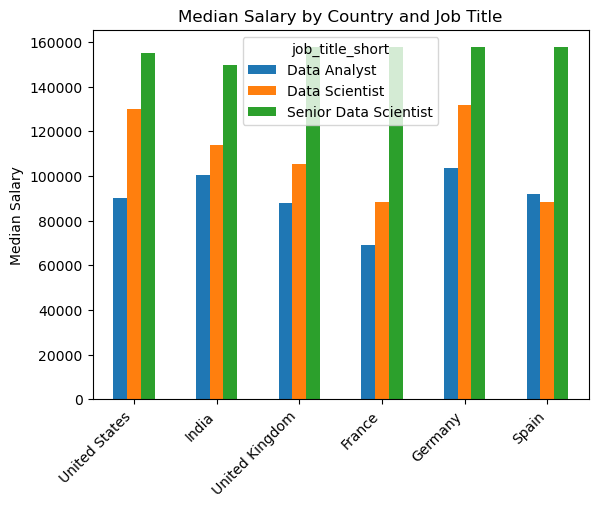

In [15]:
df_job_country_salary.plot(kind='bar')
plt.title('Median Salary by Country and Job Title')
plt.ylabel('Median Salary')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()